#### accepts.csv 数据集描述与属性说明
- 数据说明：本数据是一份汽车贷款违约数据,因变量为是否违约(bad_ind)
- [T]因变量,[N]数值变量,[C]分类变量,[S]序数变量,[D]时间
- application_id	申请者ID
- account_number	帐户号
- [T]bad_ind	是否违约
- [D]vehicle_year	汽车购买时间
- [C]vehicle_make	汽车制造商
- [C]bankruptcy_ind	曾经破产标识
- [N]tot_derog	五年内信用不良事件数量(比如手机欠费消号)
- [N]tot_tr	全部帐户数量
- [N]age_oldest_tr	最久账号存续时间(月)
- [N]tot_open_tr	在使用帐户数量
- [N]tot_rev_tr	在使用可循环贷款帐户数量(比如信用卡)
- [N]tot_rev_debt	在使用可循环贷款帐户余额(比如信用卡欠款)
- [N]tot_rev_line	可循环贷款帐户限额(信用卡授权额度)
- [N]rev_util	可循环贷款帐户使用比例(余额/限额)
- [N]fico_score	FICO打分
- [N]purch_price	汽车购买金额(元)
- [N]msrp	建议售价
- [N]down_pyt	分期付款的首次交款
- [N]loan_term	贷款期限(月)
- [N]loan_amt	贷款金额
- [N]ltv	贷款金额/建议售价*100
- [N]tot_income	月均收入(元)
- [N]veh_mileage	行使历程(Mile)
- [C]used_ind	是否使用
- [N]weight	样本权重

# 数据整合和数据清洗
- pandas学习参考： [十分钟搞定pandas](http://www.cnblogs.com/chaosimple/p/4153083.html)

## SQL语句介绍

In [1]:
import os

# os.chdir('E:/data')

In [7]:
import pandas as pd
import numpy as np

sale1 = pd.read_csv('sale.csv', encoding='gbk')
sale.head()

,year,market,sale,profit
0,2010,东,33912,2641
1,2010,南,32246,2699
2,2010,西,34792,2574
3,2010,北,31884,2673
4,2011,东,31651,2437


- SQL2数据过滤与排序
- 选择表中指定列

In [14]:
import sqlite3 # sqlite3相当于轻量版，更多功能可使用SQLAlchemy

con = sqlite3.connect(':memory:') # 数据库连接  con = sqlite3.connect('mydata.db')
sale.to_sql('sale', con) # 将DataFrame注册成可用sql查询的表
newTable = pd.read_sql_query("select year , sale, market,profit from sale", con) # 也可使用read_sql
newTable.head()

,year,sale,market,profit
0,2010,33912,东,2641
1,2010,32246,南,2699
2,2010,34792,西,2574
3,2010,31884,北,2673
4,2011,31651,东,2437


- 选择表中所有列

In [15]:
sqlResult = pd.read_sql_query('select * from sale', con)
sqlResult

,index,year,market,sale,profit
0,0,2010,东,33912,2641
1,1,2010,南,32246,2699
2,2,2010,西,34792,2574
3,3,2010,北,31884,2673
4,4,2011,东,31651,2437
5,5,2011,南,30572,2853
6,6,2011,西,34175,2877
7,7,2011,北,30555,2749
8,8,2012,东,31619,2106
9,9,2012,南,32443,3124


- 删除重复的行

In [5]:
pd.read_sql_query("select DISTINCT  year, market from sale", con)

,year,market
0,2010,东
1,2010,南
2,2010,西
3,2010,北
4,2011,东
5,2011,南
6,2011,西
7,2011,北
8,2012,东
9,2012,南


- 选择满足条件的行

In [6]:
pd.read_sql_query("select * from sale where year=2012 and market='东'", con)

,index,year,market,sale,profit
0,8,2012,东,31619,2106


- 对行进行排序

In [39]:
sql = '''select year, market, sale, profit
      from sale
      order by year'''
pd.read_sql_query(sql, con)
sale[(sale['year']>2011) & (sale['profit']<3000)]
(sale['year']>2011) & (sale['profit']<3000)
sale[(sale['market'].isin(['东','南'])) & (sale['profit']<9000)]

sale.sort_values('profit')
sale['profit'].rank(axis=0)

0      5.0
1      7.0
2      3.0
3      6.0
4      2.0
5      9.0
6     10.0
7      8.0
8      1.0
9     12.0
10     4.0
11    11.0
Name: profit, dtype: float64

##  纵向连接表
sql操作

In [41]:
#one = pd.read_csv("one.csv")
#one.to_sql('one', con, index=False)
print(one)
print(one.T)
one.T

   x  a
0  1  a
1  1  a
2  1  b
3  2  c
4  3  v
5  4  e
6  6  g
   0  1  2  3  4  5  6
x  1  1  1  2  3  4  6
a  a  a  b  c  v  e  g


,0,1,2,3,4,5,6
x,1,1,1,2,3,4,6
a,a,a,b,c,v,e,g


In [38]:
two = pd.read_csv("two.csv")
two.to_sql('two', con, index=False)
two.T

,0,1,2,3,4
x,1,2,3,3,5
b,x,y,z,v,w


union 和 union all

In [43]:
#去重复
union = pd.read_sql('select * from one UNION select * from two', con)
print(union)
#不去重复
union_all = pd.read_sql('select * from one UNION ALL select * from two', con)
print(union_all)
union.T

   x  a
0  1  a
1  1  b
2  1  x
3  2  c
4  2  y
5  3  v
6  3  z
7  4  e
8  5  w
9  6  g
    x  a
0   1  a
1   1  a
2   1  b
3   2  c
4   3  v
5   4  e
6   6  g
7   1  x
8   2  y
9   3  z
10  3  v
11  5  w


,0,1,2,3,4,5,6,7,8,9
x,1,1,1,2,2,3,3,4,5,6
a,a,b,x,c,y,v,z,e,w,g


In [11]:
union_all.T

,0,1,2,3,4,5,6,7,8,9,10,11
x,1,1,1,2,3,4,6,1,2,3,3,5
a,a,a,b,c,v,e,g,x,y,z,v,w


except 和 intersect

In [12]:
#差集
exceptTable = pd.read_sql('select * from one EXCEPT select * from two', con)
#交集
intersectTable = pd.read_sql('select * from one INTERSECT select * from two', con)
exceptTable.T

,0,1,2,3,4
x,1,1,2,4,6
a,a,b,c,e,g


In [13]:
intersectTable.T

,0
x,3
a,v


*练习： 多表纵向连接

DataFrame操作

In [14]:
pd.concat([one, two], axis=0, join='outer', ignore_index=True) # 更多参数可查看文档或帮助

,a,b,x
0,a,NaN,1
1,a,NaN,1
2,b,NaN,1
3,c,NaN,2
4,v,NaN,3
5,e,NaN,4
6,g,NaN,6
7,NaN,x,1
8,NaN,y,2
9,NaN,z,3


##   横向连接表
sql操作

In [48]:
table1 = pd.read_csv('table1.csv')
table1.to_sql('table1', con, index=False)
table1.head()

,id,a
0,1,a
1,2,b
2,3,c


In [49]:
table2 = pd.read_csv('table2.csv')
table2.to_sql('table2', con, index=False)
table2.head()

,id,b
0,4,d
1,3,e


笛卡尔积

In [55]:
pd.read_sql("select * from table1, table2", con)
table1.join(table2,lsuffix='left')

内连接（使用inner join或使用where子句）

In [18]:
#inner join
pd.read_sql("select * from table1 as a inner join table2 as b on a.id=b.id", con)
# pd.read_sql("select * from table1 as a, table2 as b where a.id=b.id", con)

,id,a,id,b
0,3,c,3,e


左连接

In [19]:
#left join
pd.read_sql("select * from table1 as a left join table2 as b on a.id=b.id", con)

,id,a,id,b
0,1,a,NaN,None
1,2,b,NaN,None
2,3,c,3.0,e


In [44]:
# Attention: RIGHT and FULL OUTER JOINs are NOT currently supported, like:
# "select * from table1 as a RIGHT JOIN table2 as b on a.id=b.id"
# "select * from table1 as a FULL JOIN table2 as b on a.id=b.id"
#left join
pd.read_sql("select * from table1 as a FULL JOIN table2 as b on a.id=b.id", con)

DatabaseError: Execution failed on sql 'select * from table1 as a FULL JOIN table2 as b on a.id=b.id': RIGHT and FULL OUTER JOINs are not currently supported

DataFrame操作

In [21]:
pd.merge(table1, table2, on='id', how='left') # 参数设置可查看帮助

,id,a,b
0,1,a,NaN
1,2,b,NaN
2,3,c,e


按索引连接

In [56]:
#按照？拼接
table1.join(table2, how='inner', lsuffix='t1', rsuffix='t2') # 参数设置可查看帮助

,idt1,a,idt2,b
0,1,a,4,d
1,2,b,3,e


In [22]:
#按照索引拼接
table1.join(table2, how='outer', lsuffix='t1', rsuffix='t2') # 参数设置可查看帮助

,idt1,a,idt2,b
0,1,a,4.0,d
1,2,b,3.0,e
2,3,c,NaN,NaN


排序

In [23]:
pd.read_sql("select * from table2 order by id", con)

,id,b
0,3,e
1,4,d


### apply\map\groupby及其它相关

In [57]:
data = pd.DataFrame(data={'a':range(1,11), 'b':np.random.randn(10)})
data.T

,0,1,2,3,4,5,6,7,8,9
a,1.000000,2.000000,3.000000,4.00000,5.00000,6.000000,7.000000,8.000000,9.000000,10.0000
b,-1.076426,-0.132863,0.272082,0.57197,1.22581,-2.047148,0.250095,-0.855334,-0.633494,-1.2083


In [25]:
data.apply(np.mean) # 等价于data.mean()，是其完整形式

a    5.500000
b    0.012329
dtype: float64

In [26]:
data.apply(lambda x: x.astype('str')).dtypes # DataFrame没有astype方法，只有Series有

a    object
b    object
dtype: object

In [27]:
(data['a']- data['a'].mean()) / data['a'].std()

0   -1.486301
1   -1.156012
2   -0.825723
3   -0.495434
4   -0.165145
5    0.165145
6    0.495434
7    0.825723
8    1.156012
9    1.486301
Name: a, dtype: float64

In [28]:
#标准化
data['a'].map(lambda x: (x - data['a'].mean()) / data['a'].std())  # 等价于(data['a']- data['a'].mean()) / data['a'].std()

0   -1.486301
1   -1.156012
2   -0.825723
3   -0.495434
4   -0.165145
5    0.165145
6    0.495434
7    0.825723
8    1.156012
9    1.486301
Name: a, dtype: float64

In [29]:
data['a'].map(lambda x: int(str(x), base=16))  # 不支持“广播”时，可以使用map进行函数映射

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    16
Name: a, dtype: int64

分组-应用/聚合

In [58]:
key = [1, 2] * 5
key

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2]

In [59]:
group1, group2 = data.groupby(key) # 使用groupby可按照‘key’进行分组，‘key’需与待分组数据有同样长度
print(group1)
print(group2)

(1,    a         b
0  1 -1.076426
2  3  0.272082
4  5  1.225810
6  7  0.250095
8  9 -0.633494)
(2,     a         b
1   2 -0.132863
3   4  0.571970
5   6 -2.047148
7   8 -0.855334
9  10 -1.208300)


In [60]:
data.groupby(key).aggregate(np.mean) 
data.groupby(key).mean()
# 聚合函数在各分组中进行聚合，是data.groupby(key).mean()的完整形式，可传入函数或字符串(sum/mean/median/std/var等)，也可传入列表

,a,b
1,5,0.007614
2,6,-0.734335


In [62]:
data.groupby(key).agg({'a': 'std', 'b':'std'}) # agg可以在多列上使用不同的聚合函数

,a,b
1,3.162278,0.894274
2,3.162278,1.003863


In [ ]:
data.groupby(key).agg({'a': 'sum', 'b':'count'}) # agg可以在多列上使用不同的聚合函数

In [34]:
data.groupby(key).transform(np.mean) # 转换函数可在各分组内进行运算，将结果广播到原数据中

,a,b
0,5,0.532891
1,6,-0.508233
2,5,0.532891
3,6,-0.508233
4,5,0.532891
5,6,-0.508233
6,5,0.532891
7,6,-0.508233
8,5,0.532891
9,6,-0.508233


In [35]:
data.groupby(key).apply(np.mean) # apply是一般化的‘分组-应用/聚合’函数，更灵活地实现aggregate或transform的功能

,a,b
1,5.0,0.532891
2,6.0,-0.508233


*练习：对accepts数据集，按照是否破产汇总违约率



In [66]:
import pandas as pd

accepts = pd.read_csv('accepts.csv')

按照违约指示变量进行分组汇总

In [68]:
print(accepts['bad_ind'].groupby(accepts['bankruptcy_ind']).mean())


vmean = accepts.fico_score.mean(skipna=True)
accepts['fico_score'] = accepts['fico_score'].fillna(vmean)
accepts['fico_score'].groupby(accepts['bad_ind']).apply(lambda x: x.describe())
# accepts['fico_score'].groupby(accepts['bad_ind']).describe()

bankruptcy_ind
N    0.196332
Y    0.229911
Name: bad_ind, dtype: float64


bad_ind       
0        count    4648.000000
         mean      702.531732
         std        54.251569
         min       455.000000
         25%       667.000000
         50%       701.000000
         75%       742.000000
         max       848.000000
1        count    1197.000000
         mean      658.569347
         std        49.954268
         min       443.000000
         25%       627.000000
         50%       659.000000
         75%       693.528657
         max       824.000000
Name: fico_score, dtype: float64

In [72]:
print(accepts[['purch_price','fico_score']])
print(accepts[['purch_price','fico_score']].groupby([accepts['bad_ind']]).mean())
# 按照['bad_ind', 'bankruptcy_ind']两个关键字段汇总['purch_price','fico_score']的均值
accepts[['purch_price','fico_score']].groupby([accepts['bad_ind'], accepts['bankruptcy_ind']]).mean()

      purch_price  fico_score
0        17200.00  650.000000
1        19588.54  649.000000
2        13595.00  613.000000
3        12999.00  603.000000
4        26328.04  764.000000
5        26272.72  680.000000
6        31069.00  794.000000
7         9600.00  722.000000
8         6700.00  664.000000
9        15543.00  646.000000
10       20160.00  718.000000
11       21983.00  744.000000
12       22000.00  763.000000
13       29607.00  678.000000
14       15651.93  639.000000
15       63700.00  689.000000
16       36669.00  784.000000
17       27200.00  674.000000
18       21079.00  666.000000
19       14550.00  557.000000
20       20924.19  746.000000
21       13159.00  710.000000
22       24995.00  654.000000
23       24400.00  693.528657
24        6838.00  715.000000
25       12860.00  650.000000
26       18709.57  705.000000
27       10126.10  776.000000
28       12320.00  626.000000
29       31120.00  685.000000
...           ...         ...
5815     32325.00  701.000000
5816     2

purch_price  fico_score
bad_ind bankruptcy_ind                          
0       N               19617.341636  706.511610
        Y               18518.990986  658.128367
1       N               18183.452950  657.214105
        Y               20884.490291  645.122194

crosstab 和pivot_table

In [39]:
pd.crosstab(accepts.bad_ind, accepts.bankruptcy_ind)

bankruptcy_ind,N,Y
bad_ind,,
0,4163,345
1,1017,103


In [40]:
accepts.pivot_table(['purch_price', 'fico_score'], 
                    index='bad_ind', columns='bankruptcy_ind', aggfunc=np.mean) # index、columns、aggfunc参数均可传入列表

fico_score               purch_price              
bankruptcy_ind           N           Y             N             Y
bad_ind                                                           
0               706.511610  658.128367  19617.341636  18518.990986
1               657.214105  645.122194  18183.452950  20884.490291

## 数据清洗

发现数据问题类型

In [73]:
accepts = pd.read_csv('accepts.csv')
accepts.head()

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,...,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1,1.00
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,...,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0,4.75
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,...,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1,1.00
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,...,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1,1.00
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,...,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0,4.75


In [74]:
pd.set_option('display.max_columns', None) # 设置显示所有列
# Try this: pd.describe_option('display')

- 脏数据或数据不正确

(array([  5.91994459e-06,   2.91396236e-05,   4.43535745e-05,
          4.14702854e-05,   3.06119415e-05,   1.51219310e-05,
          8.22044119e-06,   2.42318975e-06,   9.50871929e-07,
          5.21445896e-07,   2.76059592e-07,   6.13465761e-08,
          0.00000000e+00,   3.06732880e-08,   3.06732880e-08,
          3.06732880e-08,   6.13465761e-08,   3.06732880e-08,
          0.00000000e+00,   3.06732880e-08]),
 array([      0. ,    5577.7,   11155.4,   16733.1,   22310.8,   27888.5,
          33466.2,   39043.9,   44621.6,   50199.3,   55777. ,   61354.7,
          66932.4,   72510.1,   78087.8,   83665.5,   89243.2,   94820.9,
         100398.6,  105976.3,  111554. ]),
 <a list of 20 Patch objects>)

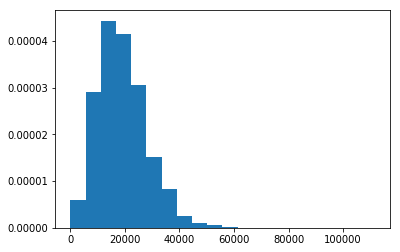

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#直方图
plt.hist(accepts['purch_price'], bins=20, normed=True)
# Try this: accepts['purch_price'].plot(kind='hist')
# And this: sns.distplot(accepts['purch_price'], kde=True, fit=stats.norm) #should import seaborn as sns and scipy.stats first

In [44]:
accepts['purch_price'].describe(include='all')

count      5845.000000
mean      19145.235109
std        9356.070282
min           0.000000
25%       12684.000000
50%       18017.750000
75%       24500.000000
max      111554.000000
Name: purch_price, dtype: float64

In [45]:
def f(x, n=100):
    if x < n:
        x = np.nan
    return x

accepts['purch_price'] = accepts['purch_price'].map(f)
# Or try: accepts['purch_price'][accepts['purch_price'] < 100] = np.nan # It causes a Warning
accepts.purch_price.describe() # It will not count 'nan' value

count      5797.000000
mean      19303.759222
std        9230.404715
min         500.290000
25%       12795.000000
50%       18079.530000
75%       24533.500000
max      111554.000000
Name: purch_price, dtype: float64

- 数据不一致-
这个问题需要详细的结合描述统计进行变量说明核对

- 数据重复

In [76]:
accepts['dup'] = accepts.duplicated() # 生成重复标识变量
accepts.dup.head()

0    False
1    False
2    False
3    False
4    False
Name: dup, dtype: bool

In [77]:
accepts_dup = accepts[accepts['dup'] == True] # 把有重复的数据保存出来，以备核查
accepts_nodup = accepts[accepts['dup'] == False] # 注意与accepts.drop_duplicates()的区别
accepts_nodup.head()

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight,dup
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1,1.00,False
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0,4.75,False
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,NaN,NaN,NaN,0,613.0,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1,1.00,False
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1,1.00,False
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0,4.75,False


In [48]:
accepts['dup1'] = accepts['account_number'].duplicated() # 按照主键进行重复记录标识
# accepts['fico_score'].duplicated() # 没有实际意义

* 缺失值处理

In [49]:
accepts.describe()

,application_id,account_number,bad_ind,vehicle_year,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
count,5.845000e+03,5.845000e+03,5845.000000,5844.000000,5632.000000,5632.000000,5629.000000,4426.000000,5207.000000,5367.000000,5367.000000,5845.000000,5531.000000,5797.000000,5844.000000,5845.000000,5845.000000,5845.000000,5844.00000,5.840000e+03,5844.000000,5845.000000,5845.000000
mean,5.039359e+06,5.021740e+06,0.204790,1901.793634,1.910156,17.084695,154.304317,5.720063,3.093336,6218.619899,18262.655674,43.444482,693.528657,19303.759222,18643.180243,1325.375624,56.806159,17660.066222,98.78525,6.206255e+03,20167.981348,0.564756,3.982036
std,2.880450e+06,2.873516e+06,0.403583,488.024392,3.274744,10.814056,99.940540,3.165783,2.401923,8657.667616,20942.605070,75.289977,57.841522,9230.404715,10190.495573,2435.177463,14.547659,9095.267595,18.08215,1.073186e+05,29464.181138,0.495831,1.513436
min,4.065000e+03,1.161300e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,443.000000,500.290000,0.000000,0.000000,12.000000,2133.400000,0.00000,0.000000e+00,0.000000,0.000000,1.000000
25%,2.513980e+06,2.567174e+06,0.000000,1997.000000,0.000000,9.000000,78.000000,3.000000,1.000000,791.000000,3235.500000,5.000000,653.000000,12795.000000,12050.000000,0.000000,51.000000,11023.000000,90.00000,2.218245e+03,1.000000,0.000000,4.750000
50%,5.110443e+06,4.988152e+06,0.000000,1999.000000,0.000000,16.000000,137.000000,5.000000,3.000000,3009.000000,10574.000000,30.000000,693.000000,18079.530000,17475.000000,500.000000,60.000000,16200.000000,100.00000,3.400000e+03,8000.000000,1.000000,4.750000
75%,7.526973e+06,7.556672e+06,0.000000,2000.000000,2.000000,24.000000,205.000000,7.000000,4.000000,8461.500000,26196.000000,66.000000,735.500000,24533.500000,23751.250000,1750.000000,60.000000,22800.000000,109.00000,5.156250e+03,34135.500000,1.000000,4.750000
max,1.000012e+07,1.001022e+07,1.000000,9999.000000,32.000000,77.000000,588.000000,26.000000,24.000000,96260.000000,205395.000000,2500.000000,848.000000,111554.000000,222415.000000,35000.000000,660.000000,111554.000000,176.00000,8.147167e+06,999999.000000,1.000000,4.750000


In [50]:
vmean = accepts['tot_derog'].mean(axis=0, skipna=True)
accepts['tot_derog_empflag'] = accepts['tot_derog'].isnull()
accepts['tot_derog'] = accepts['tot_derog'].fillna(vmean)
accepts.tot_derog.describe()

count    5845.000000
mean        1.910156
std         3.214511
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        32.000000
Name: tot_derog, dtype: float64

- 其他有缺失变量请自行填补，找到一个有缺失的分类变量，使用众数进行填补
- 多重插补：sklearn.preprocessing.Imputer仅可用于填补均值、中位数、众数，多重插补可考虑使用Orange、impute、Theano等包
- 多重插补的处理有两个要点：1、被解释变量有缺失值的观测不能填补，只能删除；2、只对放入模型的解释变量进行插补。

* 噪声值处理
- 盖帽法

In [51]:
def blk(floor, root): # 'blk' will return a function
    def f(x):       
        if x < floor:
            x = floor
        elif x > root:
            x = root
        return x
    return f

q1 = accepts['tot_derog'].quantile(0.01) # 计算百分位数
q99 = accepts['tot_derog'].quantile(0.99)
blk_tot = blk(floor=q1, root=q99) # 'blk_tot' is a function
accepts['tot_derog'] = accepts['tot_derog'].map(blk_tot)
accepts['tot_derog'].describe()

count    5845.000000
mean        1.863457
std         2.958075
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        14.560000
Name: tot_derog, dtype: float64

- k-means聚类法、分箱（等深，等宽）
- 分箱法——等宽分箱

In [52]:
accepts['age_oldest_tr_1'] = pd.qcut(accepts['age_oldest_tr'], 4) # 这里以age_oldest_tr字段等宽分为4段
accepts.age_oldest_tr_1.head()

0     (0.999, 78.0]
1    (205.0, 588.0]
2     (0.999, 78.0]
3     (0.999, 78.0]
4     (78.0, 137.0]
Name: age_oldest_tr_1, dtype: category
Categories (4, interval[float64]): [(0.999, 78.0] < (78.0, 137.0] < (137.0, 205.0] < (205.0, 588.0]]

- 分箱法——等深分箱

In [53]:
accepts['age_oldest_tr_2'] = pd.cut(accepts['age_oldest_tr'], 4) # 这里以age_oldest_tr字段等比分为4段
# Try this: pd.cut(accepts['age_oldest_tr'], [0, 148, 295, 442, 588 ]) # 自定义分箱  [-np.nan, 148, 295, 442, np.nan ]
accepts.age_oldest_tr_2.head()

0    (0.413, 147.75]
1    (147.75, 294.5]
2    (0.413, 147.75]
3    (0.413, 147.75]
4    (0.413, 147.75]
Name: age_oldest_tr_2, dtype: category
Categories (4, interval[float64]): [(0.413, 147.75] < (147.75, 294.5] < (294.5, 441.25] < (441.25, 588.0]]